## Individual Project Planning Report
### (1) Data Description and Exploratory Data Analysis

In [1]:
library(repr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/isabelle-liang/dsci-100-group-36/refs/heads/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
mean_table_players <- summarize(players, 
                        mean_hours_played = mean(played_hours, na.rm = TRUE),
                        mean_age = mean(Age, na.rm = TRUE))
mean_table_players

mean_hours_played,mean_age
<dbl>,<dbl>
5.845918,21.13918


The players dataset has 196 observations and 7 variables. The mean for each of the qualitative variables was calculated and it was found that the mean of the number of hours played across all players is 5.85 and the mean age of players is 21.14. An explanation of each of the variables is shown below:

| Variable Name     | Type        | Description                                           |
|-------------------|-------------|-------------------------------------------------------|
| experience        | Categorical | What type of experience the player has                |
| subscribe         | Binary      | Is the player subscribed to a game related newsletter?|
| hashedEmail       | Identifier  | Hashed email of player                                |
| played_hours      | Quantitative| Number of hours played of player                      |
| name              | Identifier  | Name of player                                        |
| gender            | Categorical | Gender of player                                      |
| Age               | Quantitative| Age of player                                         |

There are a few issues with this dataset. Firstly within the experience variable, we do not know how each of the categories are measured. What makes a player a pro compared to a veteran, regular, or amateur? How were the players put into these categories? Does it have to do with their age or maybe by how many hours they have played? Another issue is in the number of hours played for the players. Are these hours referring to the players total played hours in their whole life, per day, or is it an average over a specific amount of time? Understanding the experience and hours played variables in a more in depth fashion would help us use this data when answering a question and formulating predictions.

### (2) Questions

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question: Can playtime of player predict whether a player subscribes to a video game-related newsletter in the players dataset?

I will use only the players dataset and create a classification model to answer this question.

### (3) Visualization

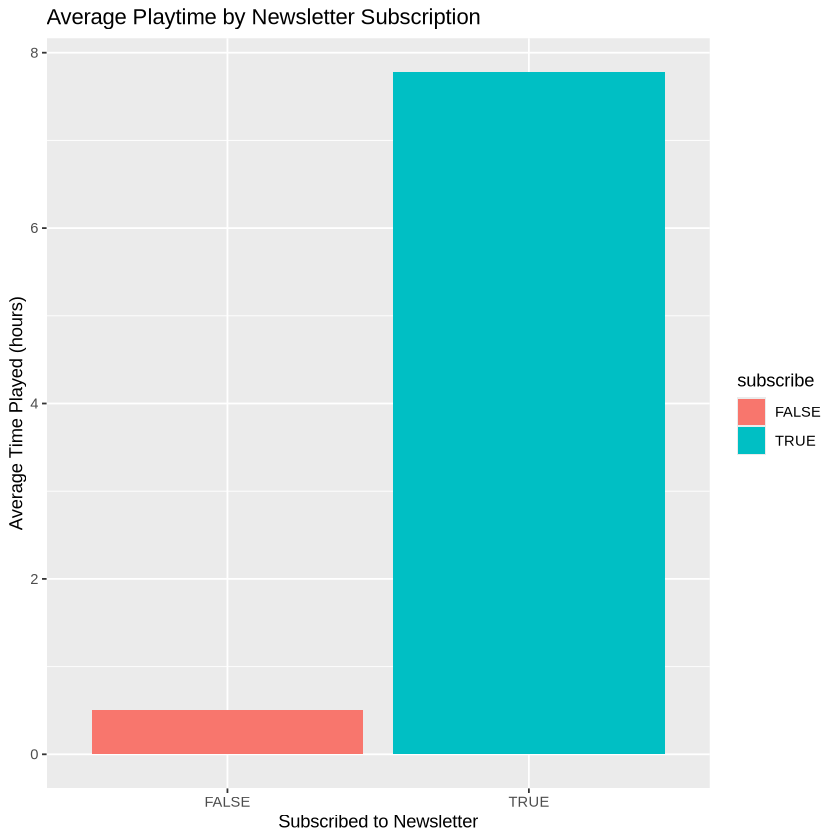

In [4]:
players_summary <- players |>
    group_by(subscribe) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))

ggplot(players_summary, aes(x = subscribe, y = mean_played_hours, fill = subscribe)) +
    geom_col() + 
    labs(title = "Average Playtime by Newsletter Subscription", x = "Subscribed to Newsletter", y = "Average Time Played (hours)")

The bar plot shown above provides insight about how hours played may influence if a player is subscribed to a video game-related newsletter.

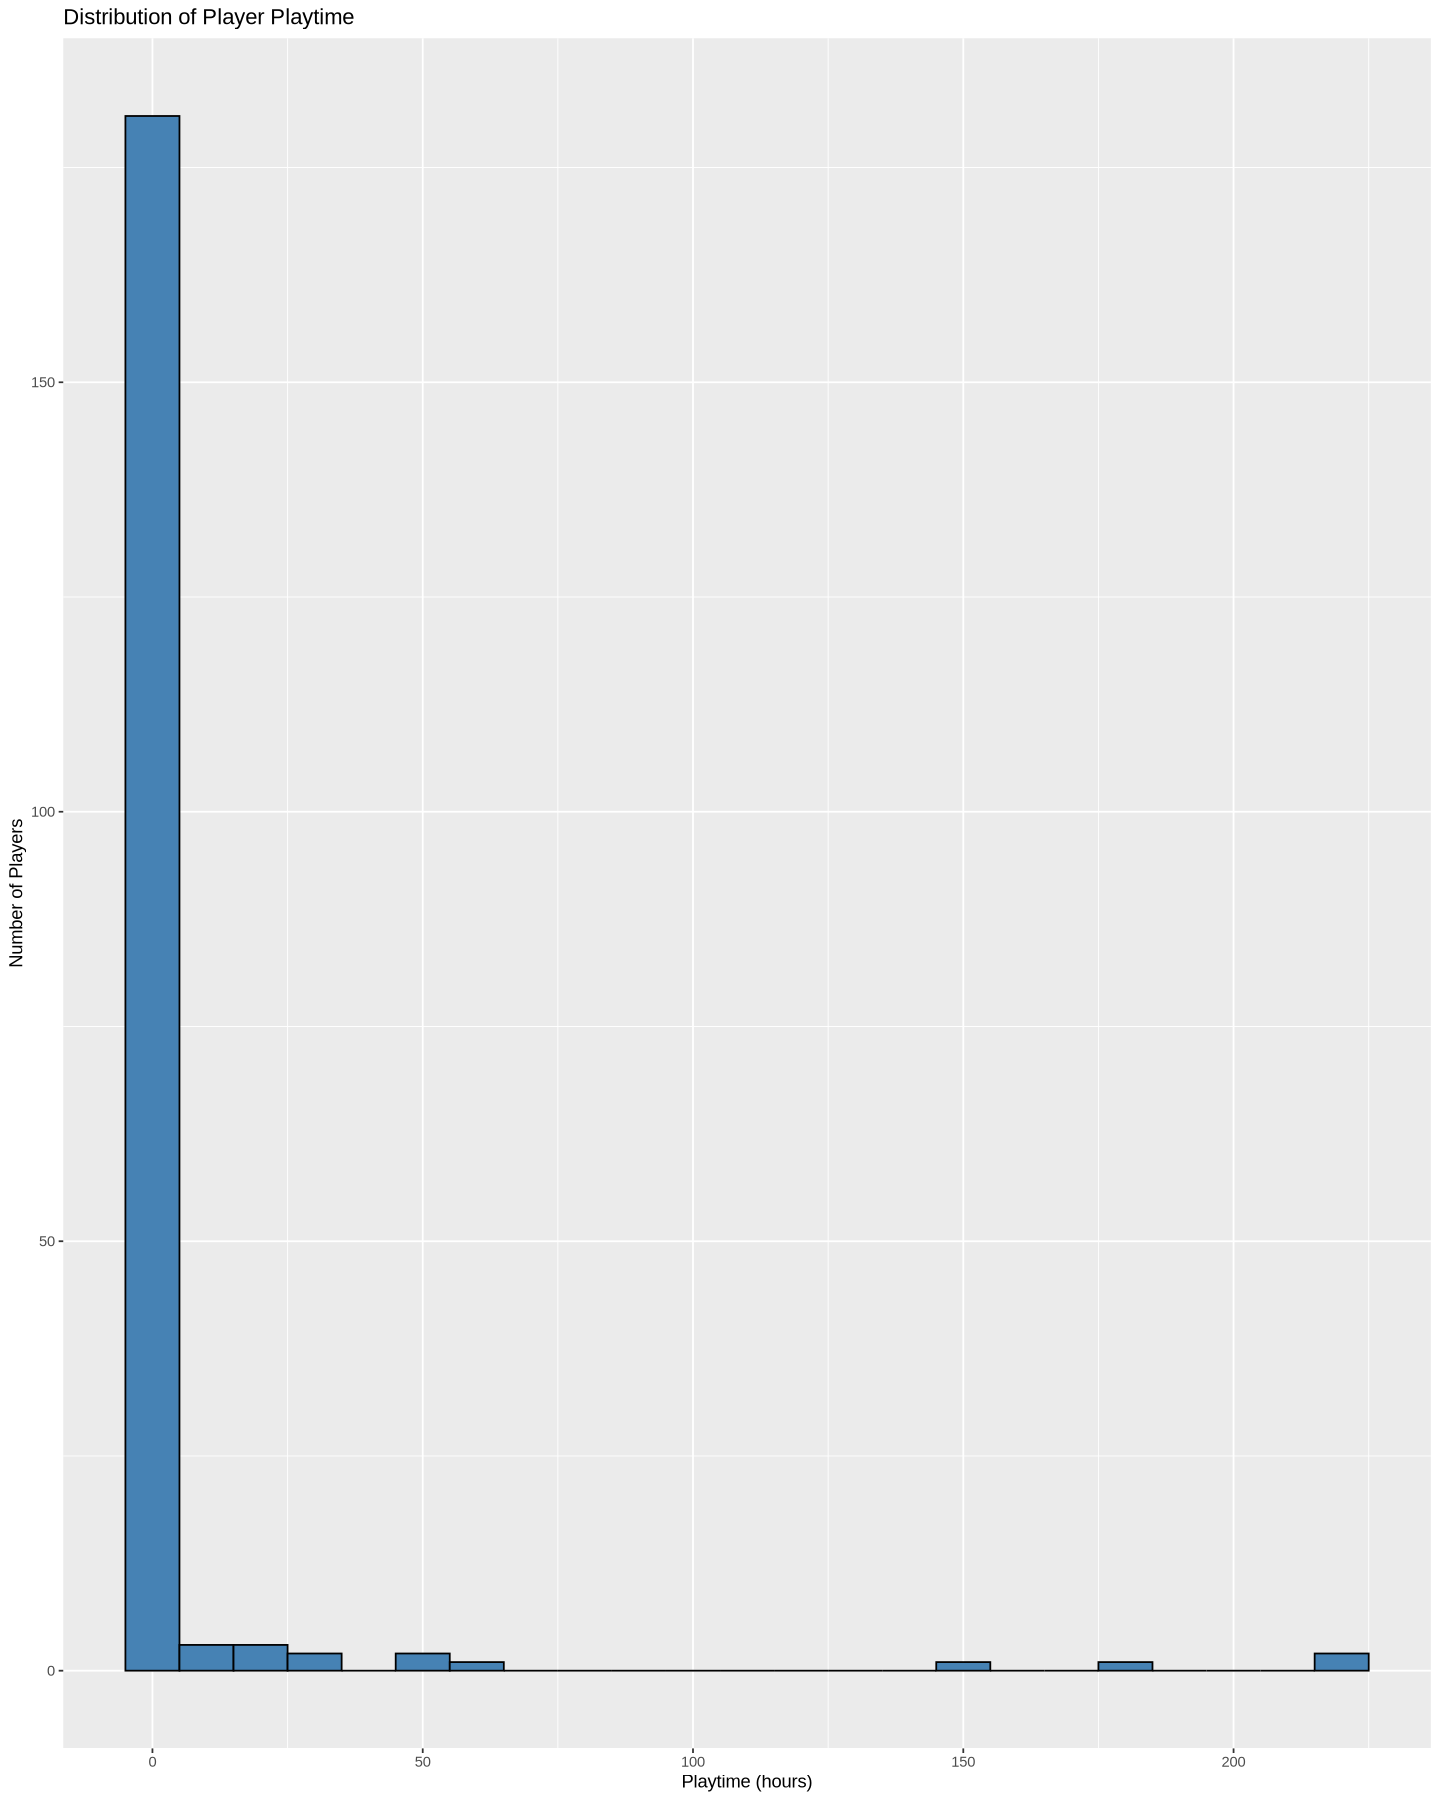

In [5]:
options(repr.plot.width = 12, repr.plot.height = 15)
ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Player Playtime", x = "Playtime (hours)", y = "Number of Players")

This plot shows the full distribution of hours played across the entire dataset which can be helpful when making predictions in the future.